In [ ]:
import torch
from tqdm import trange

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-14m').to('cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The `GPTNeoXSdpaAttention` class is deprecated in favor of simply modifying the `config._attn_implementation`attribute of the `GPTNeoXAttention` class! It will be removed in v4.48


In [ ]:
# Generate random inputs

num_samples = 3_000
seq_len = 16

torch.manual_seed(42)

inputs = torch.randint(
    0,
    model.config.vocab_size,
    size=(num_samples, seq_len)
).to('cuda')

In [ ]:
# Create a matrix of logits of shape [num_samples, vocab_size]

batch_size=100
Q = []
for i in trange(0, len(inputs), batch_size):
  Q.append(model(inputs[i:i+batch_size]).logits[:, -1, :].detach().cpu())

100%|██████████| 30/30 [00:02<00:00, 13.87it/s]


In [ ]:
Q_mat = torch.cat(Q)

Q_mat.shape

torch.Size([3000, 50304])

In [ ]:
# Use SVD to find the rank of Q_mat

_, singular_values, _ = torch.linalg.svd(Q_mat[:, :1000])

<Axes: >

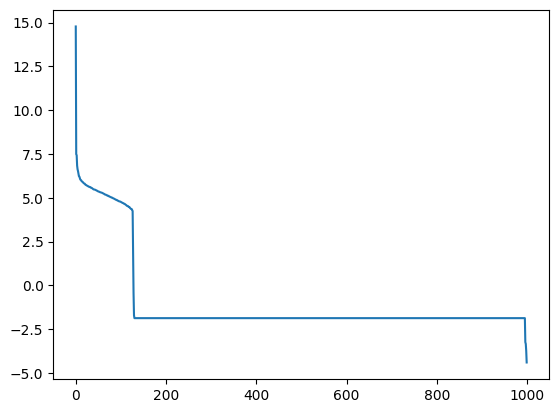

In [ ]:
import seaborn as sns

sns.lineplot(torch.log(singular_values))

In [ ]:
# Find the dip

import numpy as np

11 + np.argmax(np.divide(singular_values[10:-1], singular_values[11:]))

tensor(127)

In [ ]:
model.config.hidden_size

128